In [23]:
# Import libaries and illustris library
import numpy as np
import illustris_python as il
import matplotlib
matplotlib.use('svg')
import matplotlib.pyplot as plt
%matplotlib inline
import random
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [7]:
# Import Illustris data, specifying file path and snap
basePath = '/Users/alex/Illustris/Illustris-1'
# Load data to be used
halo_fields = ['GroupPos','GroupMass']

halo_data = il.groupcat.loadHalos(basePath,135,fields=halo_fields)
halo_data_z1 = il.groupcat.loadHalos(basePath,85,fields=halo_fields)
halo_data_joined = np.concatenate((halo_data['GroupPos'], 
                                      np.expand_dims(halo_data['GroupMass'], 0).T), axis=1)
halo_data_joined_z1 = np.concatenate((halo_data_z1['GroupPos'], 
                                      np.expand_dims(halo_data_z1['GroupMass'], 0).T), axis=1)

In [8]:
halo_data_joined_masscut = halo_data_joined[halo_data_joined[:,3]>1e-1]
halo_data_joined_masscut_z1 = halo_data_joined_z1[halo_data_joined_z1[:,3]>1e-1]

In [30]:
np.savetxt("/Users/alex/Documents/Research/Astro/vm_shared_folder_v2/il_1_snap_135_posdata_halo_mass_cutoff.txt",
           halo_data_joined_masscut, header="px,py,pz,mass", fmt='%f,%f,%f,%f')
np.savetxt("/Users/alex/Documents/Research/Astro/vm_shared_folder_v2/il_1_snap_135_posdata_halo_mass_cutoff_z1.txt",
           halo_data_joined_masscut_z1, header="px,py,pz,mass", fmt='%f,%f,%f,%f')

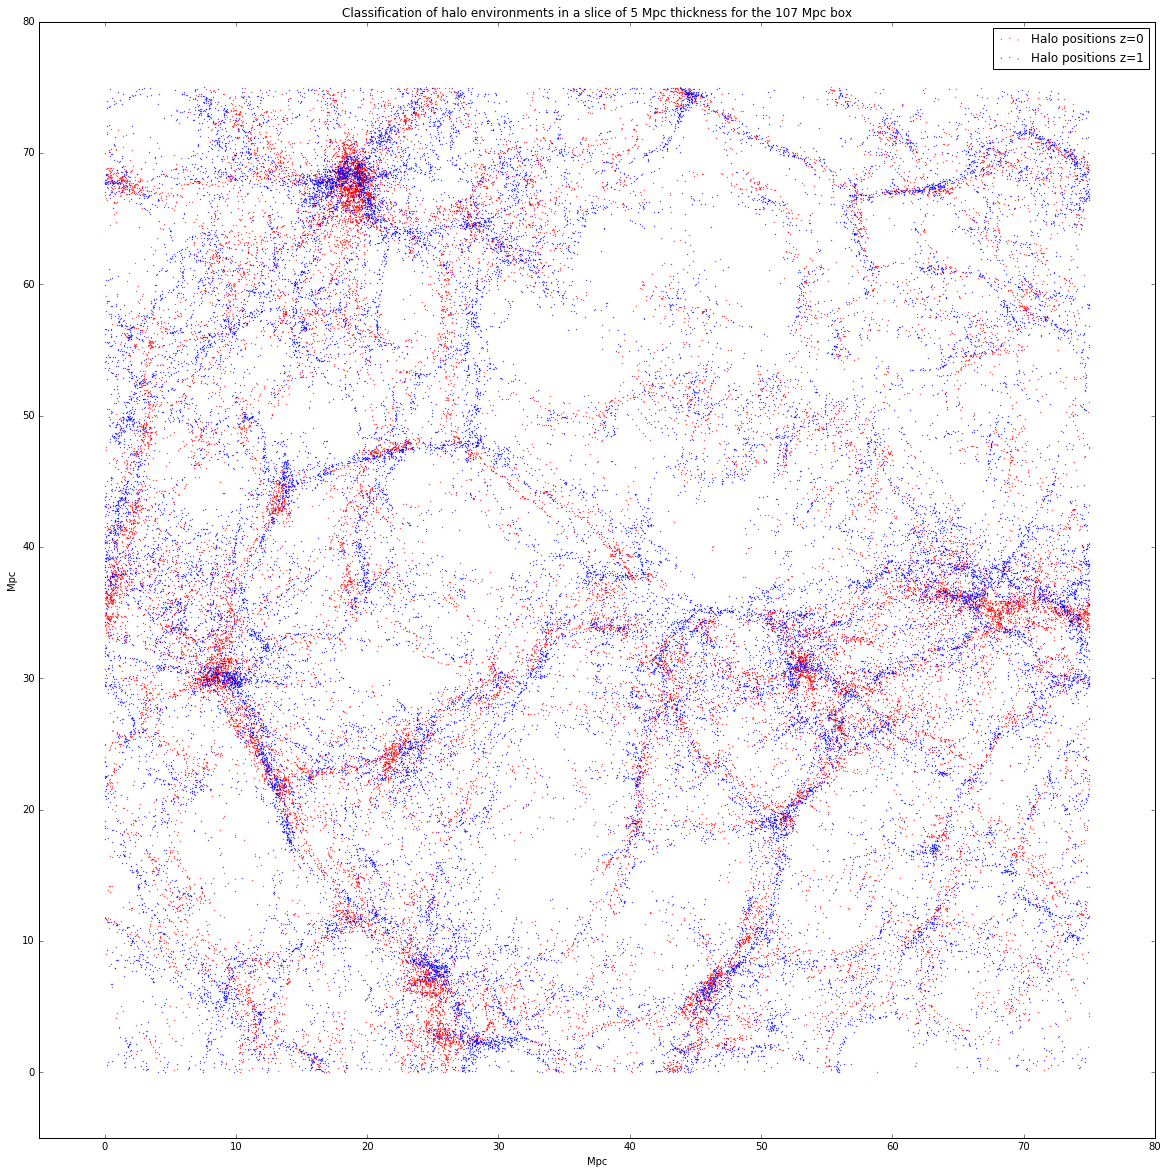

In [29]:
cutoff = (75000)/(20)

x = halo_data_joined_masscut[halo_data_joined_masscut[:,2]<cutoff][:,0:3]/1000
x1 = halo_data_joined_masscut_z1[halo_data_joined_masscut_z1[:,2]<cutoff][:,0:3]/1000

plt.scatter(x[:,0],x[:,1], marker='.', c='red', edgecolors='red',s=0.4, label='Halo positions z=0')
plt.scatter(x1[:,0],x1[:,1], marker='.', c='blue', edgecolors='blue',s=0.4, label='Halo positions z=1')

plt.xlim([-5, 5+75]); plt.ylim([-5, 5+75]);
plt.xlabel('Mpc');plt.ylabel('Mpc');plt.legend(loc='best')
plt.title('Classification of halo environments in a slice of 5 Mpc thickness for the 107 Mpc box')
plt.show()

old vvv

In [5]:
subhalo_fields = ['SubhaloCM', 'SubhaloMass']
subhalo_data = il.groupcat.loadSubhalos(basePath,135,fields=subhalo_fields)
# Define data fields, load these data fields into arrays and concatenate arrays into simple matrix
subhalo_data_joined = np.concatenate((subhalo_data['SubhaloCM'], 
                                      np.expand_dims(subhalo_data['SubhaloMass'], 0).T), axis=1)

In [35]:
#cut of data accorging to masses of halos/subhalos above 5*10^-2 10^10 Mass solar
subhalo_data_joined_masscut_e8 = subhalo_data_joined[subhalo_data_joined[:,3]>5e-2]
subhalo_data_joined_masscut_e9 = subhalo_data_joined[subhalo_data_joined[:,3]> 5e-1]
subhalo_data_joined_masscut_e10 = subhalo_data_joined[subhalo_data_joined[:,3]> 5e0]

In [41]:
# Save data in survey_ascii format, to be used with DisPerSE
np.savetxt("/Users/alex/Documents/Research/Astro/vm_shared_folder_v2/il_1_snap_135_posdata_subhalo_mass_cutoff_e8.txt",
           subhalo_data_joined_masscut_e8[:,0:3], header="px,py,pz", fmt='%f,%f,%f')

np.savetxt("/Users/alex/Documents/Research/Astro/vm_shared_folder_v2/il_1_snap_135_posdata_subhalo_mass_cutoff_e9.txt",
           subhalo_data_joined_masscut_e9[:,0:3], header="px,py,pz", fmt='%f,%f,%f')

np.savetxt("/Users/alex/Documents/Research/Astro/vm_shared_folder_v2/il_1_snap_135_posdata_subhalo_mass_cutoff_e10.txt",
           subhalo_data_joined_masscut_e10[:,0:3], header="px,py,pz", fmt='%f,%f,%f')

